In [6]:
import pandas as pd
import os

directory_path = 'files/drugs/gene_drag'

signi_size = {}
total_size = {}
all_drugs = set()

for filename in os.listdir(directory_path):  
    file_path = os.path.join(directory_path, filename)
    data = pd.read_csv(file_path, sep='\t')
    print(len(data))
    filtered_data = data[data['Significance'] < 0.05]
    signi_size[data['Selection'][0]] = len(filtered_data)
    total_size[data['Selection'][0]] = len(data)
    all_drugs.update(filtered_data['Association Name'])

922
338
3146
349
1914
1753
2892
472
4847
5344
2257
1323
2065


In [9]:
len(all_drugs)

4683

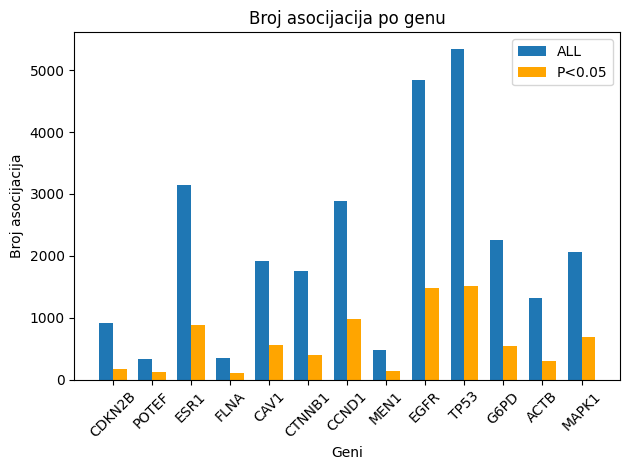

In [13]:
import numpy as np
import matplotlib.pyplot as plt

genes = list(total_size.keys())
all_counts = [total_size[gene] for gene in genes]
significant_counts = [signi_size[gene] for gene in genes]
bar_width = 0.35
ind = np.arange(len(genes))
fig, ax = plt.subplots()
all_bars = ax.bar(ind - bar_width/2, all_counts, bar_width, label='ALL')
signi_bars = ax.bar(ind + bar_width/2, significant_counts, bar_width, label='P<0.05', color='orange')

ax.set_title('Broj asocijacija po genu')
ax.set_xlabel('Geni')
ax.set_ylabel('Broj asocijacija')

ax.legend()

ax.set_xticks(ind)
ax.set_xticklabels(genes)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
